In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from sympy import init_printing
init_printing()

In [2]:
x=sympy.symbols('x')
x

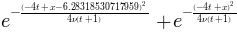

In [3]:
x,nu,t=sympy.symbols('x nu t')
phi=sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
phi

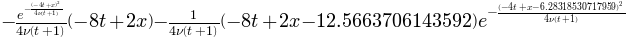

In [4]:
phiprime=phi.diff(x)
phiprime

In [5]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [6]:
from sympy.utilities.lambdify import lambdify
u=-2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [7]:
u_lamb=lambdify((t,x,nu),u)
print('The value of u at t=1,x=4,nu=3 is {}.'.format(u_lamb(1,4,3)))

The value of u at t=1,x=4,nu=3 is 3.4917066420644494.


In [8]:
nx=101
nt=100
dx=2*numpy.pi/(nx-1)
nu=0.07
sigma=0.1
dt=sigma*dx**2/nu
x=numpy.linspace(0,2*numpy.pi,nx)
un=numpy.empty(nx)
t=0

In [9]:
u=numpy.asarray([u_lamb(t,x0,nu)for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

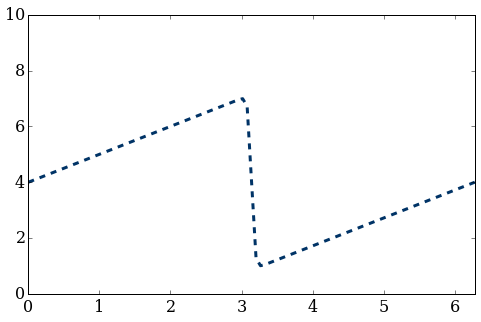

In [10]:
pyplot.figure(figsize=(8,5),dpi=100)
pyplot.plot(x,u,color='#003366',ls='--',lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);

In [11]:
for n in range(nt):
    un=u.copy()
    u[1:-1]=un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2])
    u[0]=un[0]-un[0]*dt/dx*(un[0]-un[-1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1])
    u[-1]=un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2])
    u_analytical=numpy.asarray([u_lamb(nt*dt,xi,nu)for xi in x])

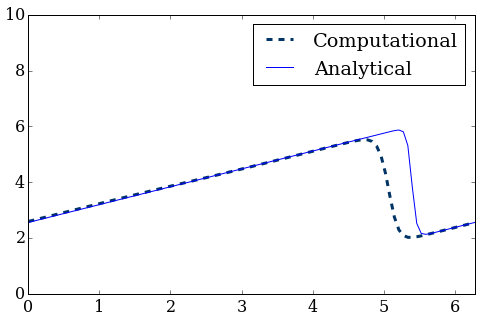

In [12]:
pyplot.figure(figsize=(8,5),dpi=100)
pyplot.plot(x,u,color='#003366',ls='--',lw=3,label='Computational')
pyplot.plot(x,u_analytical,label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [13]:
u

array([ 2.59354848,  2.63365763,  2.67376668,  2.71387555,  2.75398413,
        2.79409224,  2.83419962,  2.87430587,  2.91441045,  2.95451255,
        2.99461104,  3.03470439,  3.07479053,  3.11486672,  3.15492941,
        3.19497412,  3.23499524,  3.27498598,  3.31493826,  3.35484269,
        3.39468862,  3.43446434,  3.47415731,  3.5137546 ,  3.5532434 ,
        3.59261169,  3.63184895,  3.67094698,  3.70990067,  3.74870873,
        3.78737431,  3.82590536,  3.86431483,  3.90262047,  3.9408444 ,
        3.97901234,  4.01715258,  4.05529473,  4.09346845,  4.13170204,
        4.17002123,  4.20844812,  4.24700039,  4.28569076,  4.32452688,
        4.36351141,  4.40264247,  4.44191425,  4.48131778,  4.52084173,
        4.56047332,  4.60019902,  4.64000532,  4.67987923,  4.71980871,
        4.75978297,  4.7997926 ,  4.83982962,  4.87988742,  4.91996067,
        4.96004512,  5.00013747,  5.04023509,  5.08033572,  5.12043702,
        5.16053577,  5.20062617,  5.24069637,  5.28072085,  5.32

In [14]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
u=numpy.asarray([u_lamb(t,x0,nu)for x0 in x])


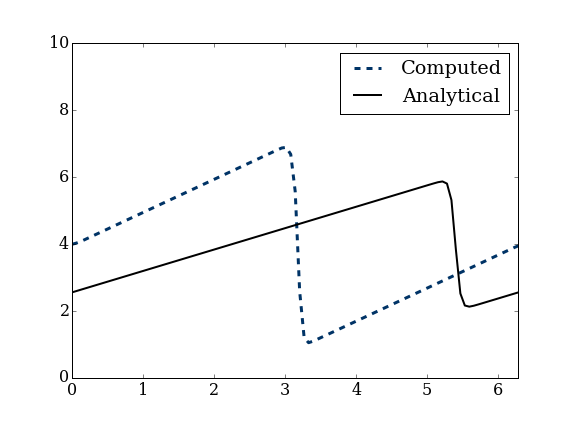
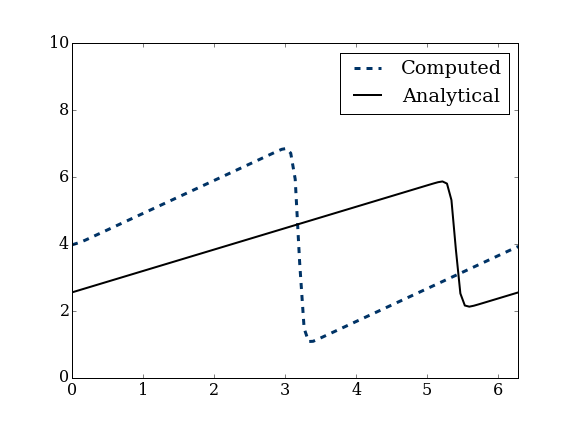
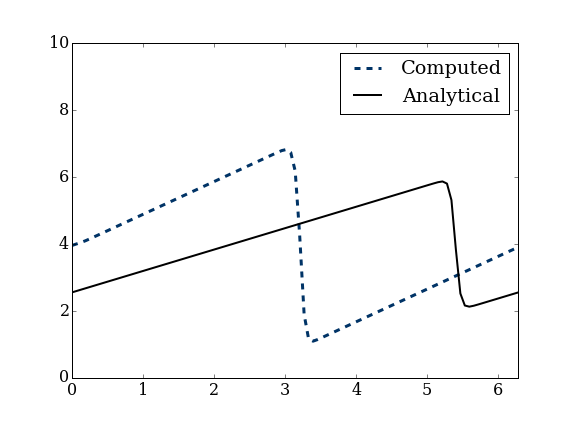
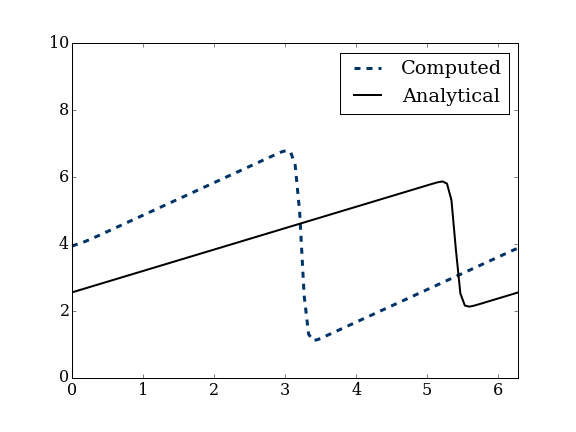
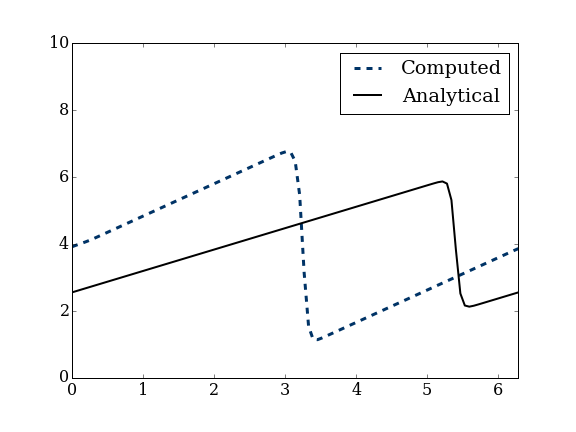
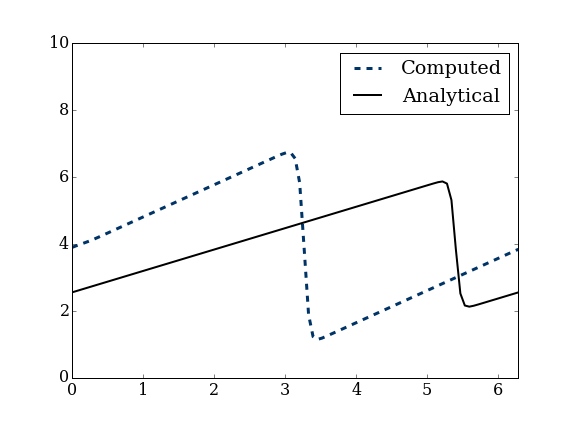
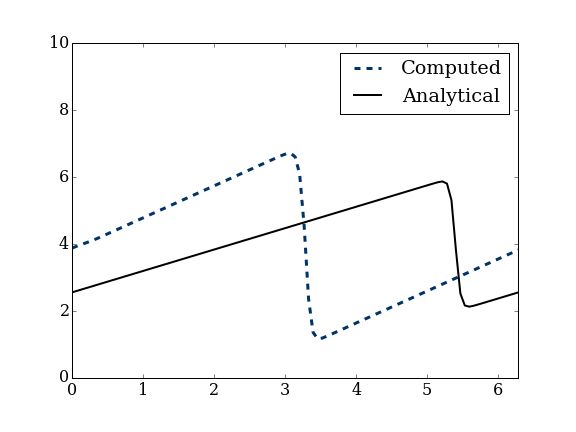
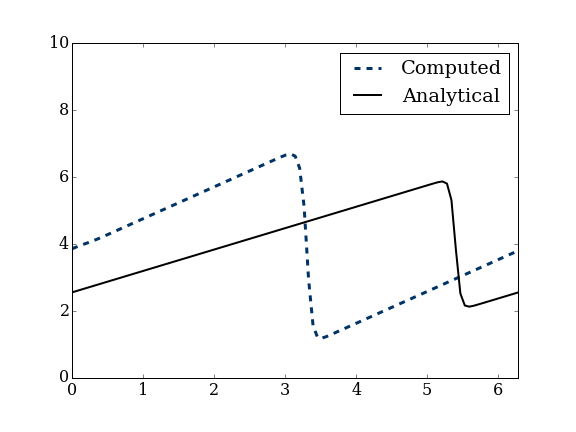
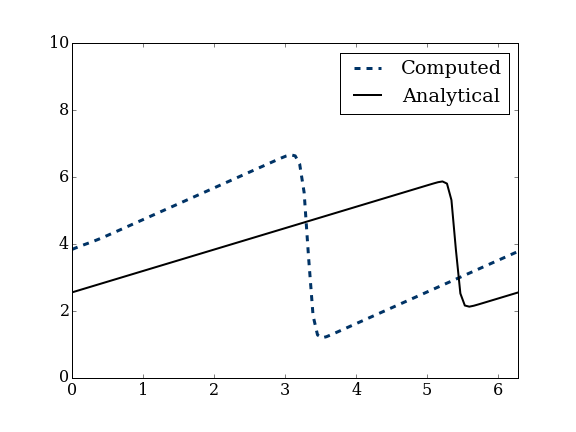
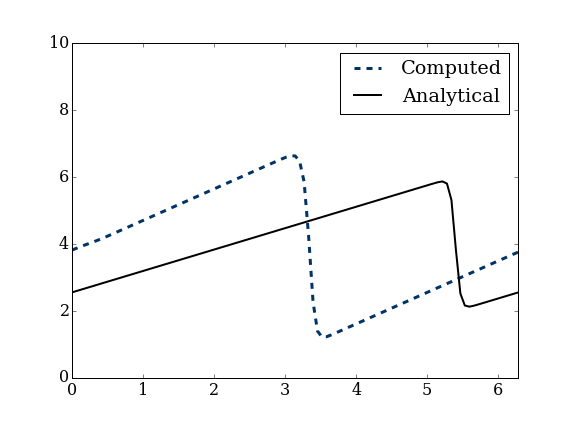
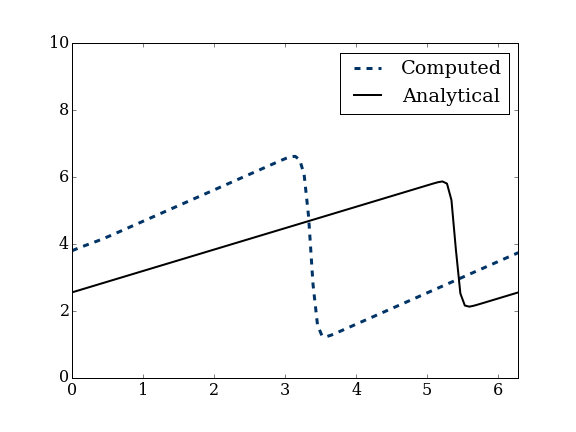
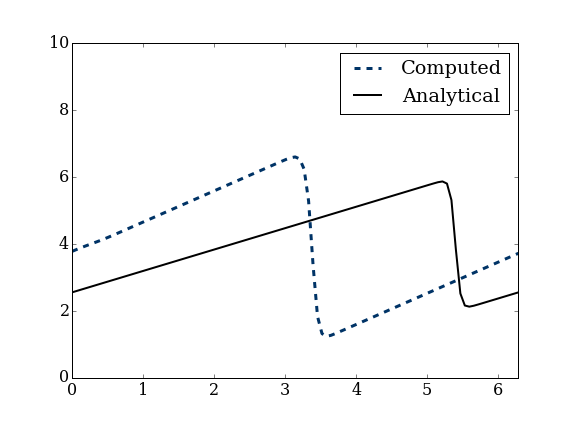
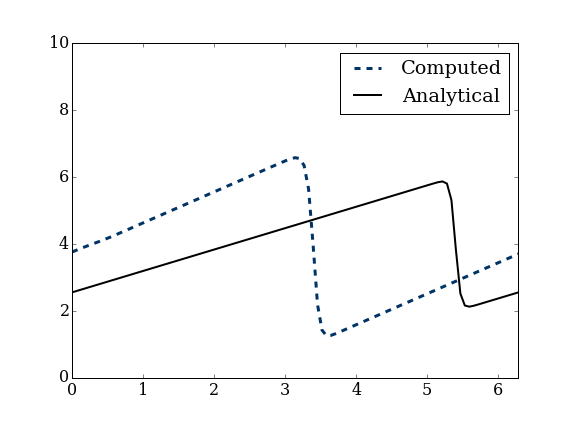
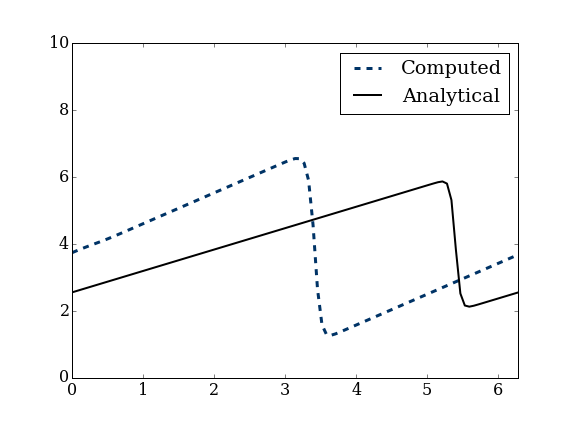
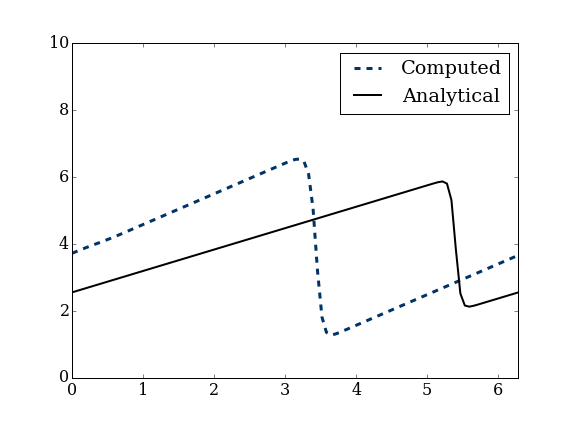
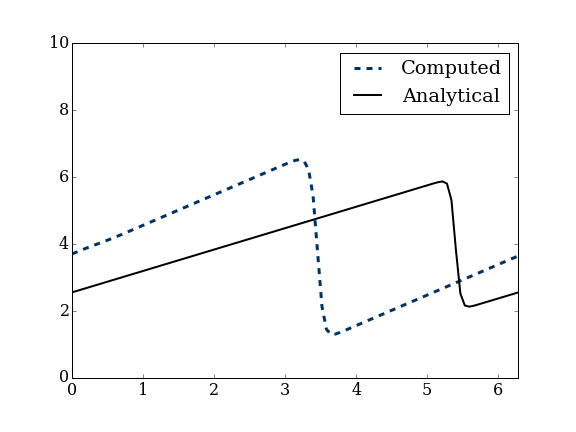
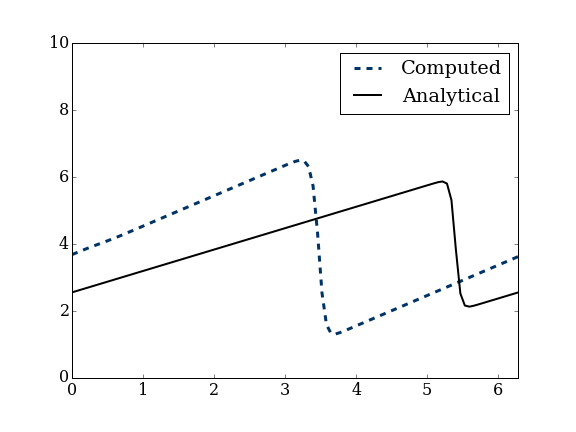
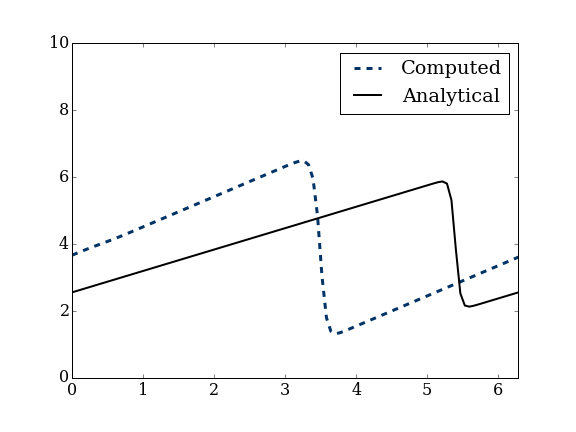
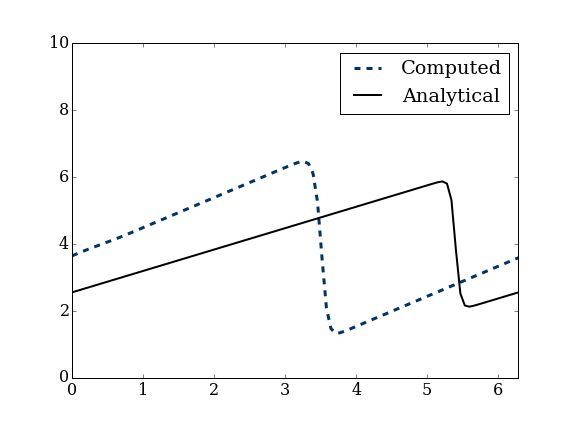
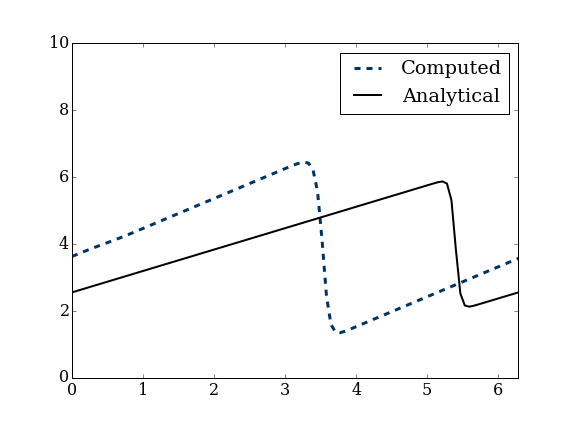
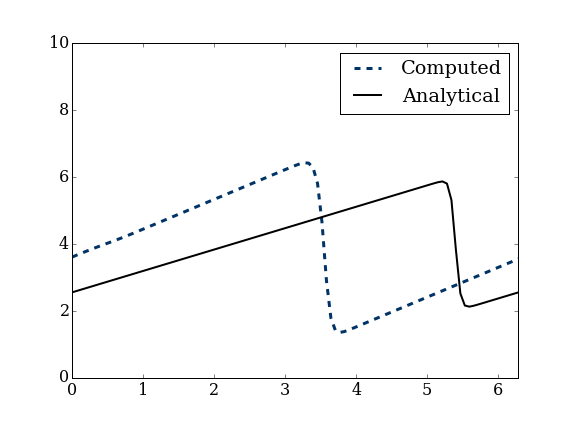
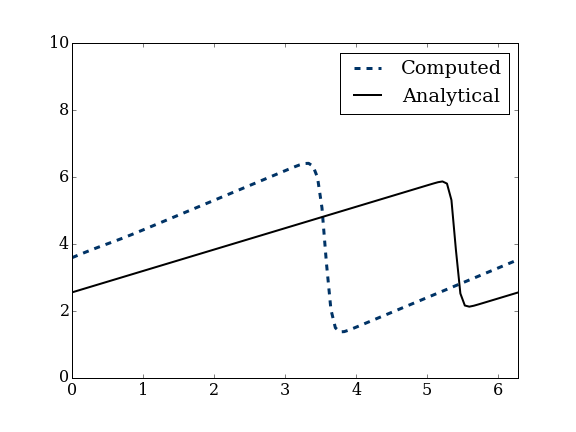
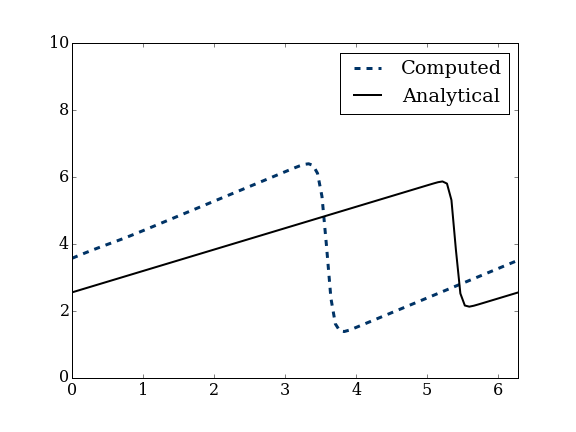
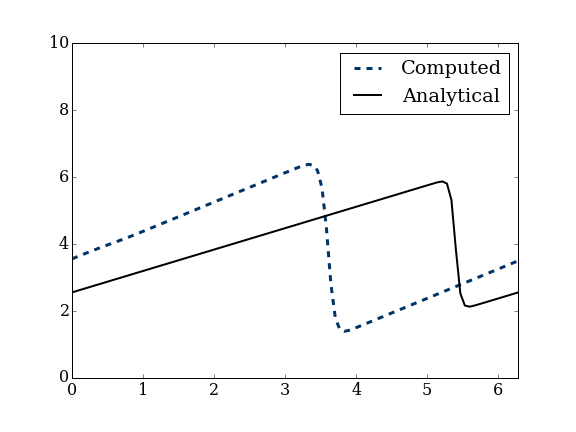
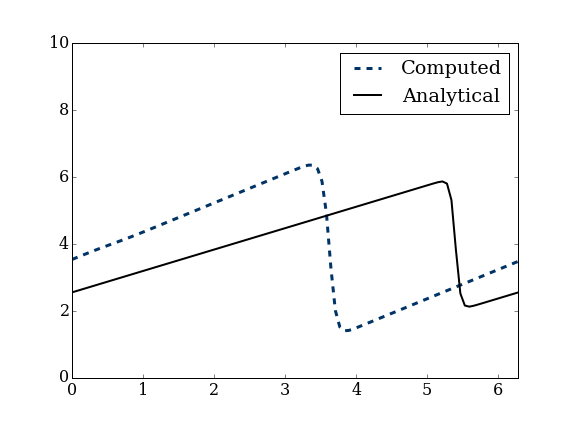
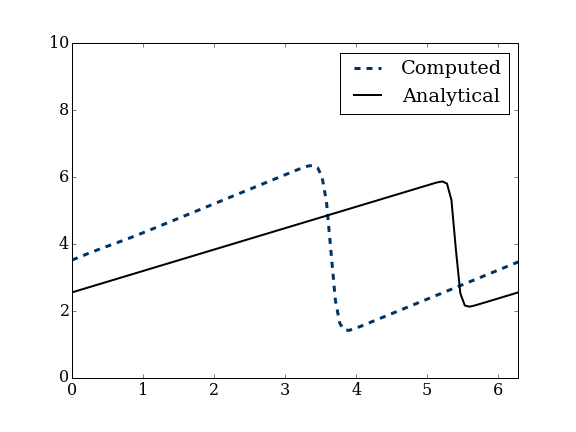
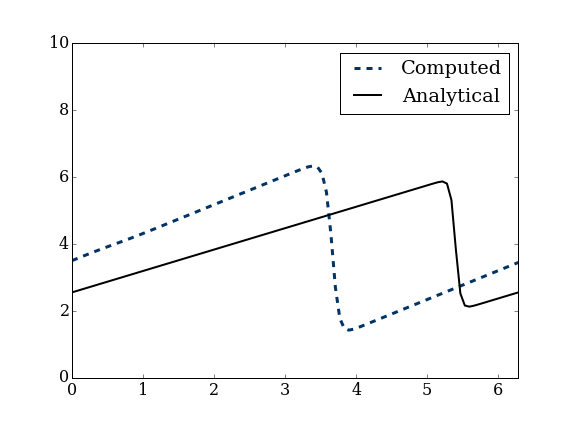
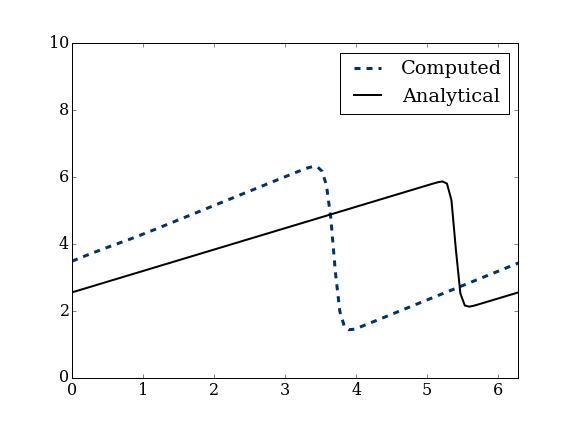
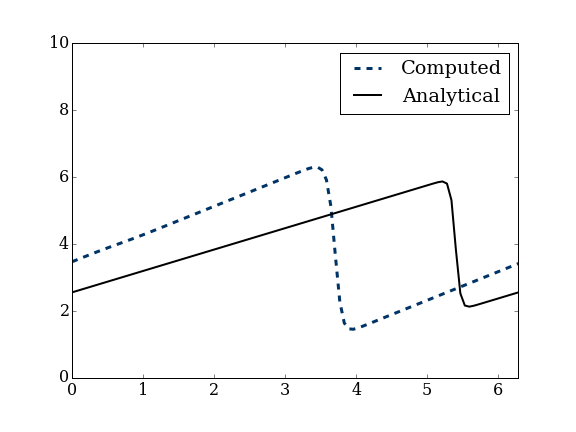
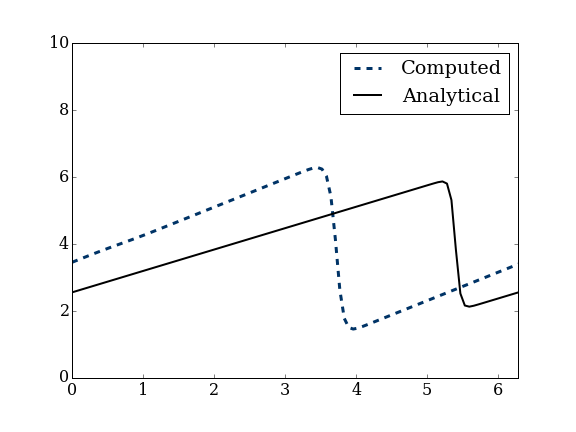
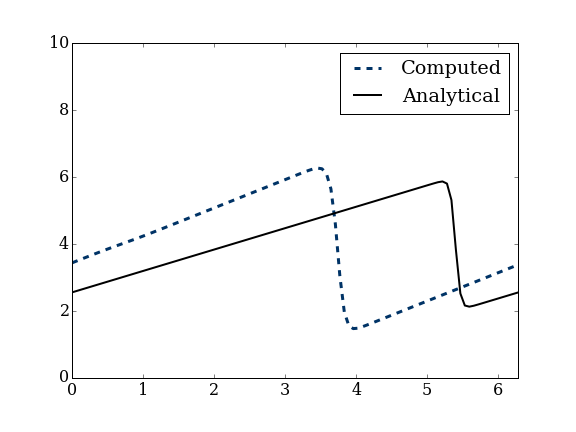
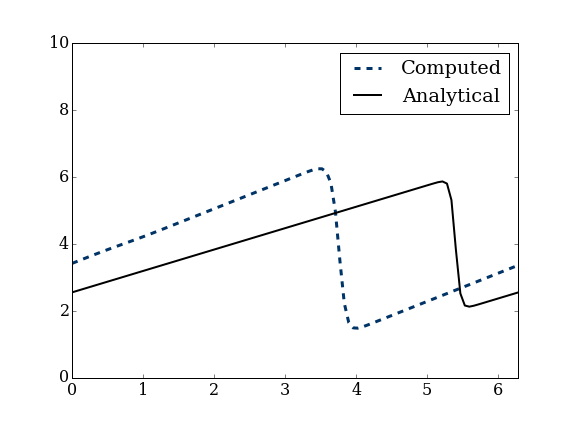
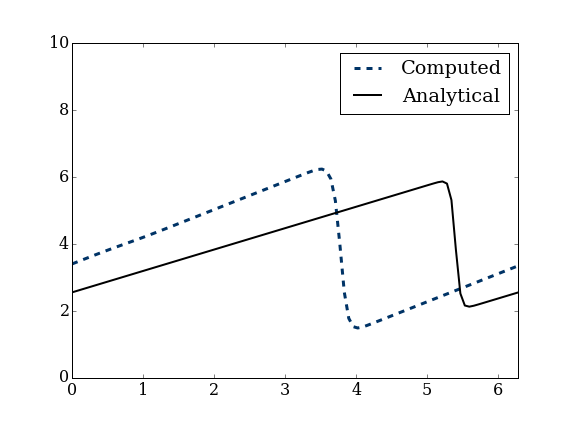
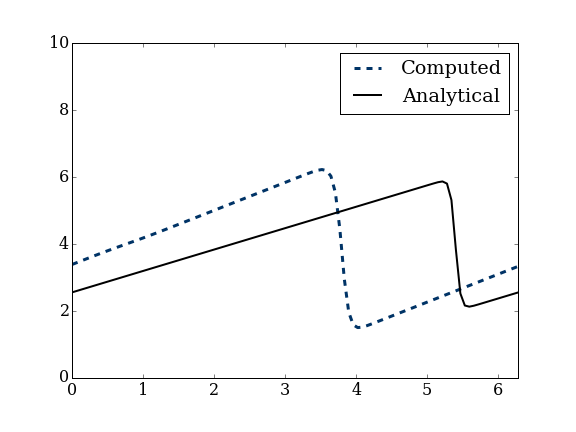
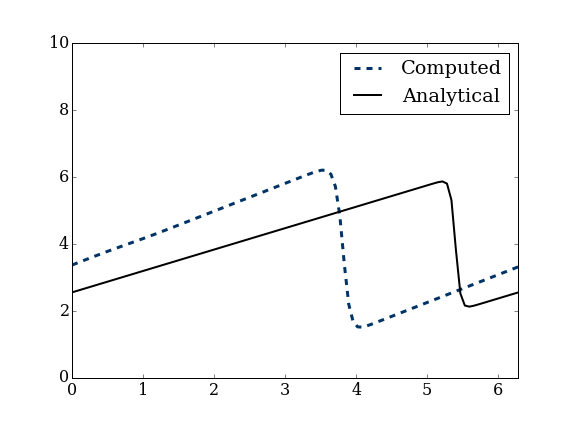
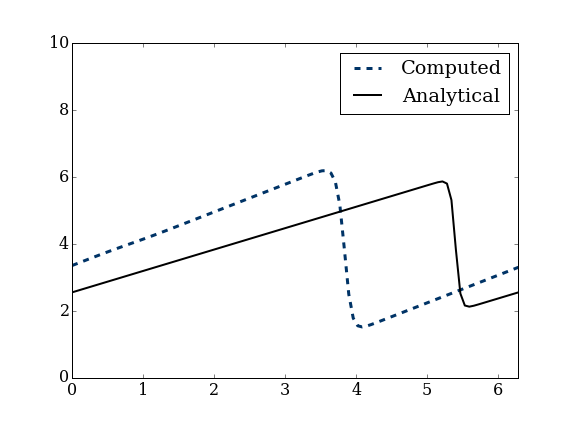
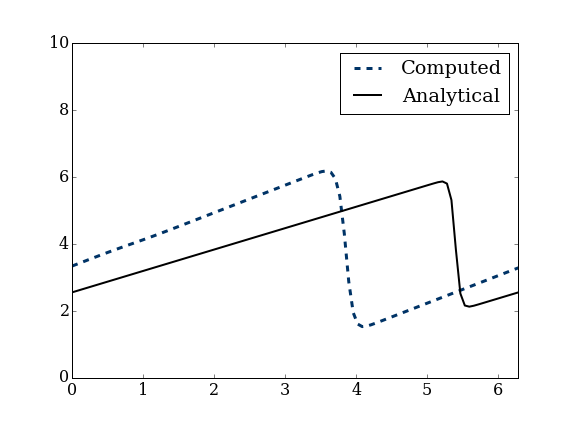
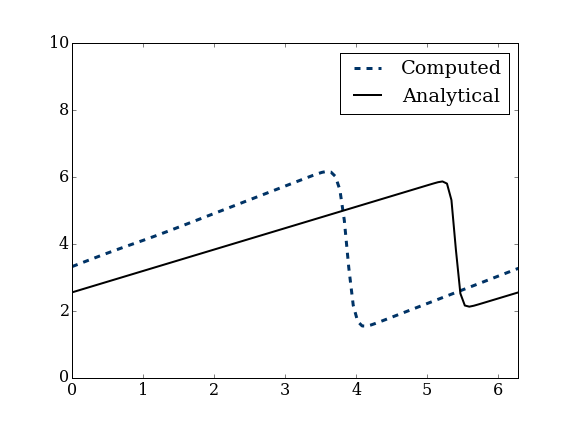
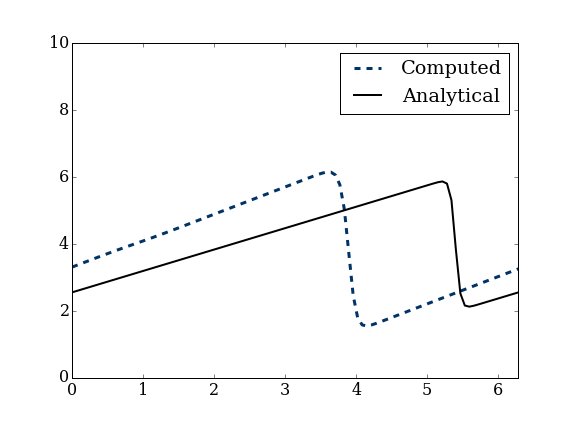
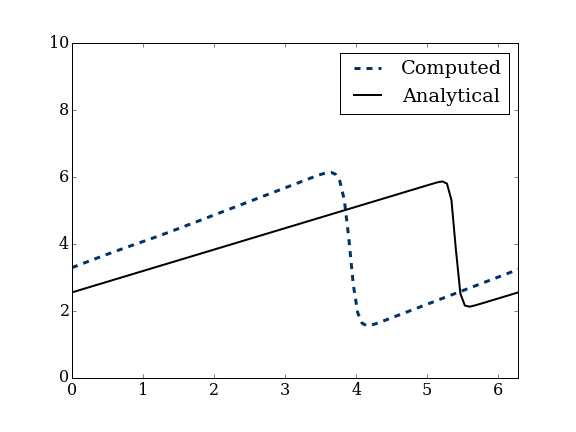
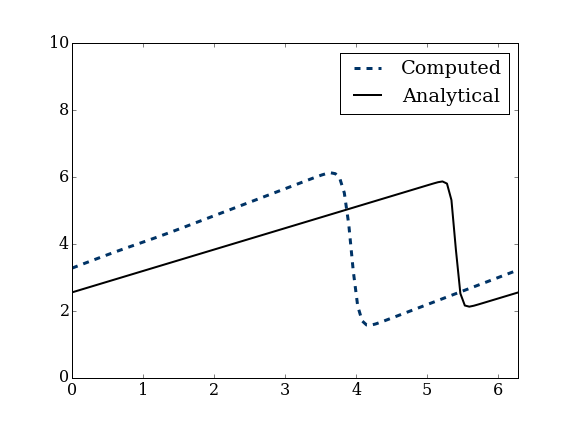
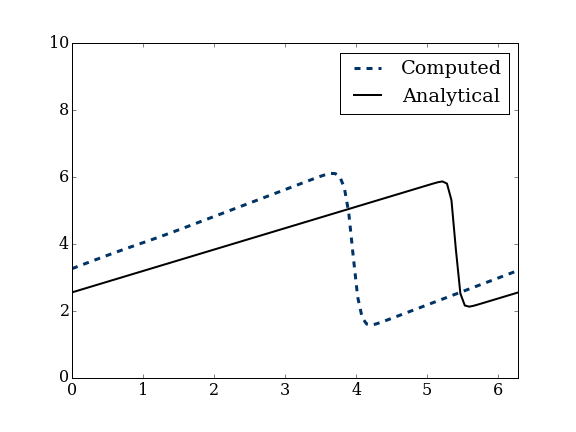
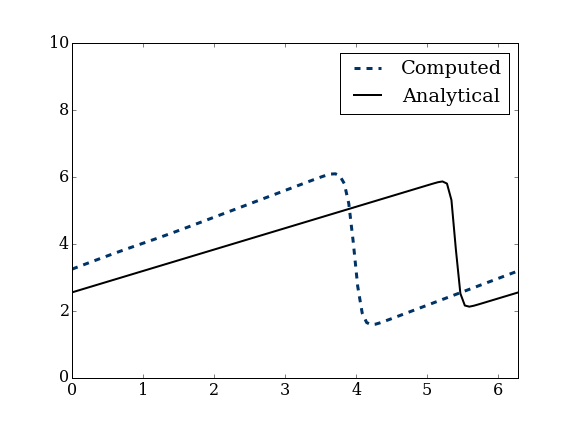
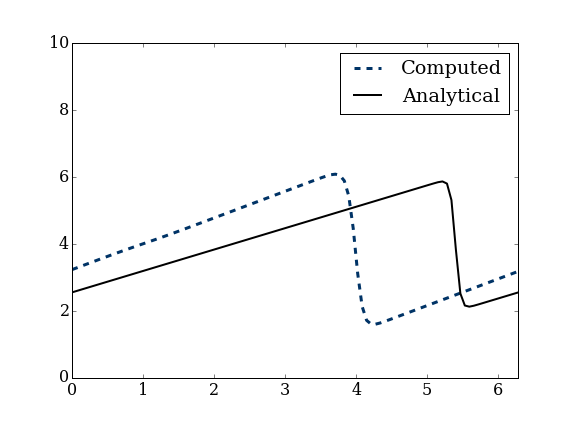
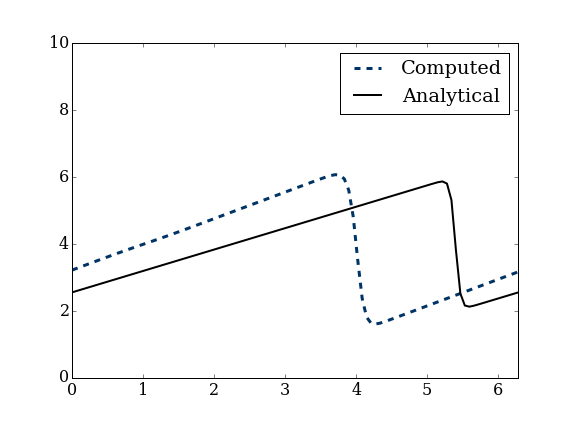
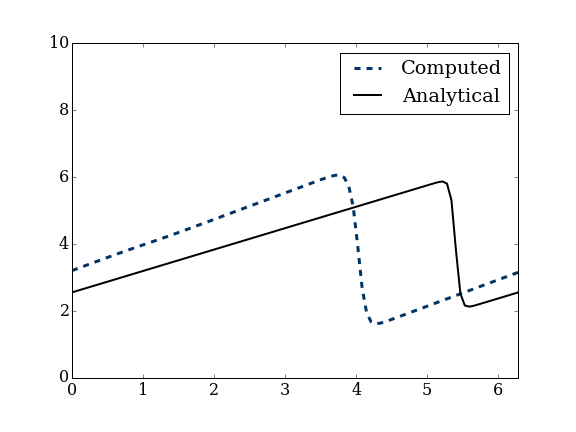
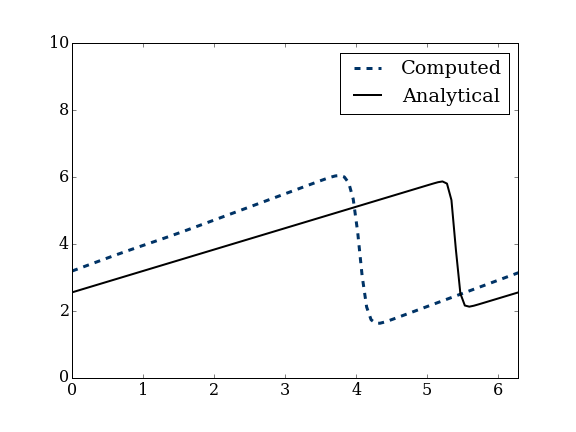
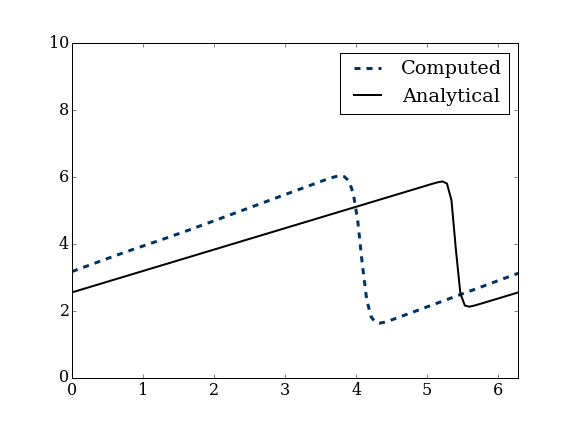
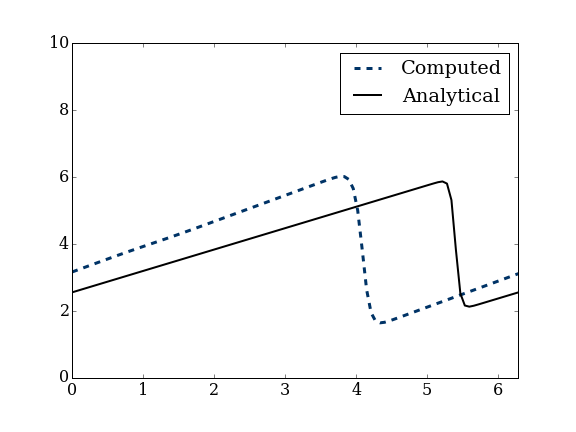
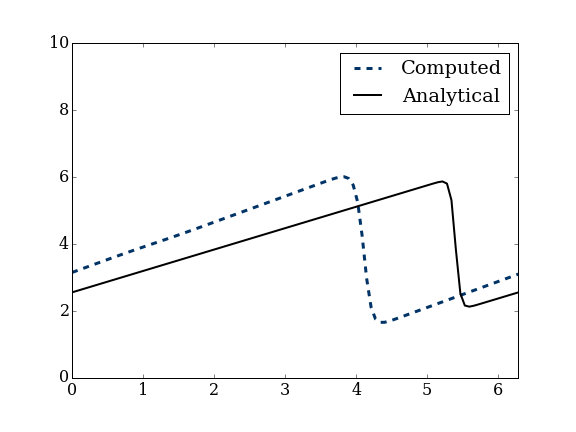
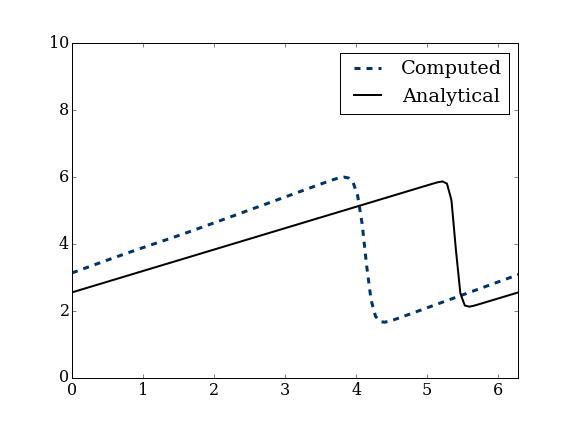
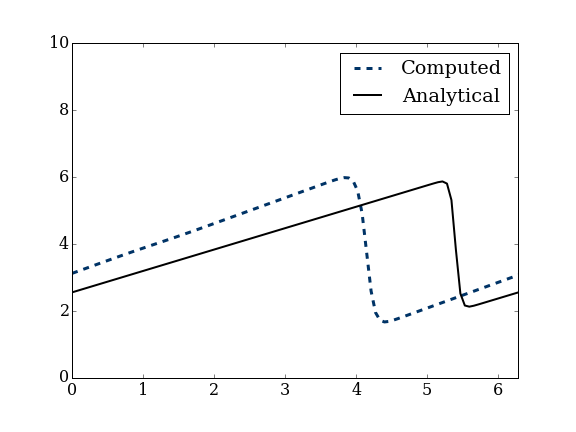
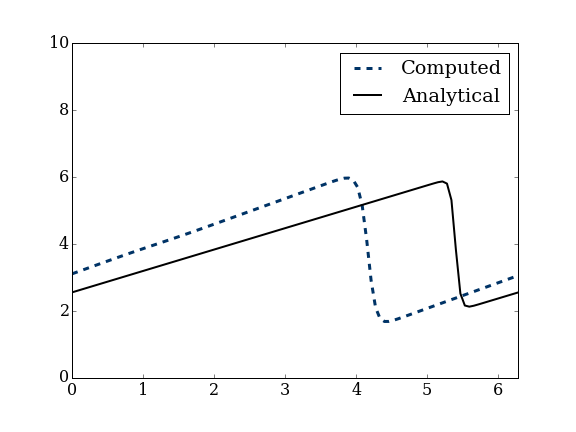
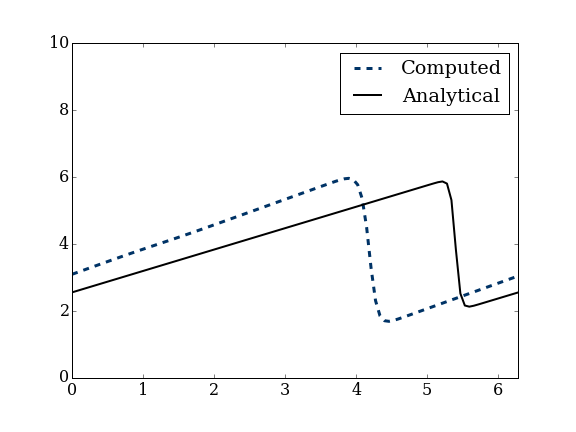
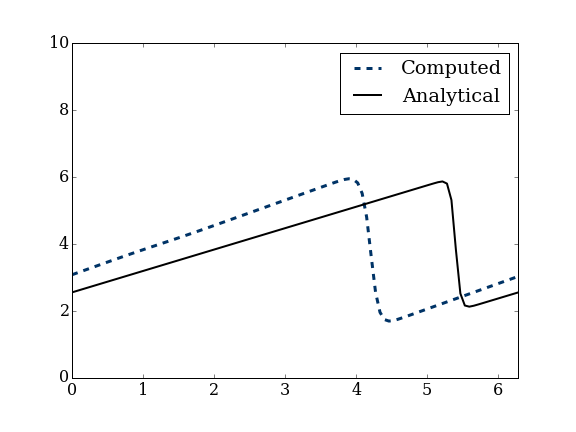
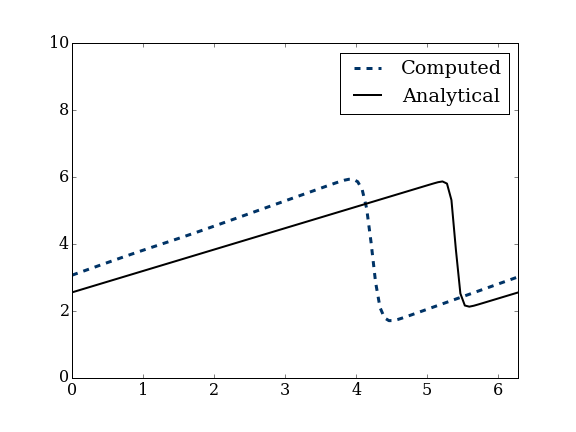
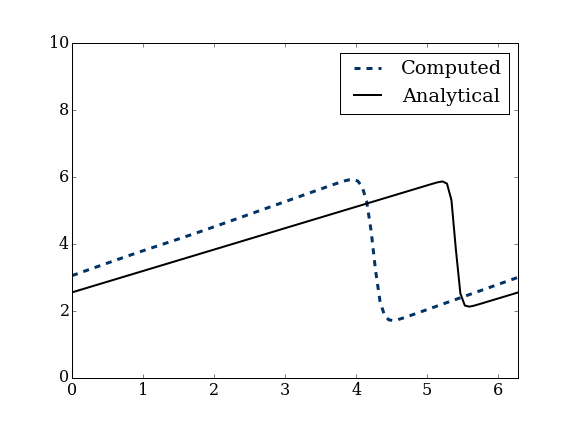
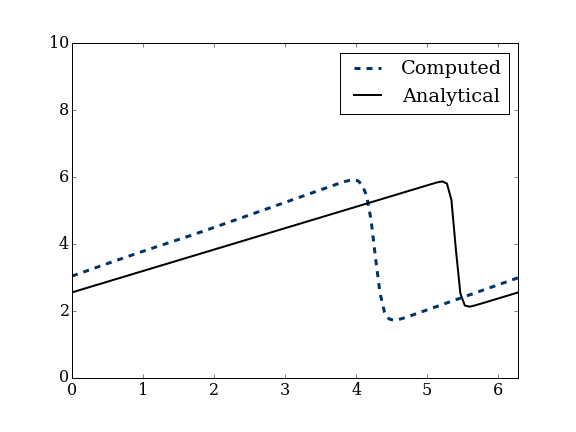
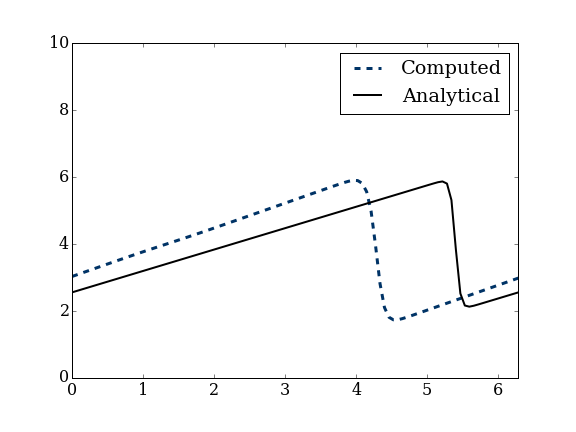
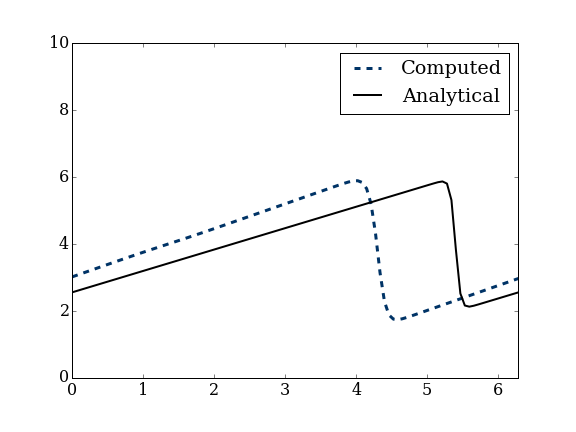
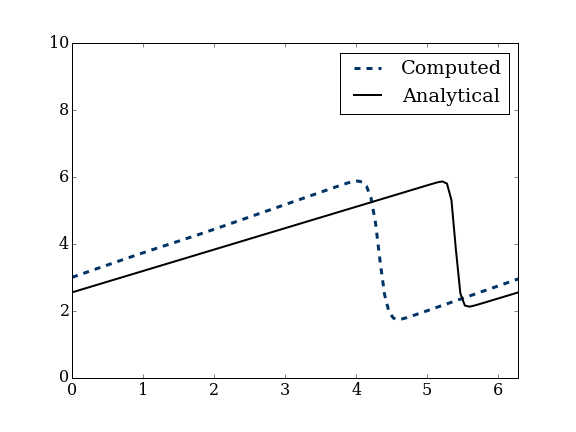
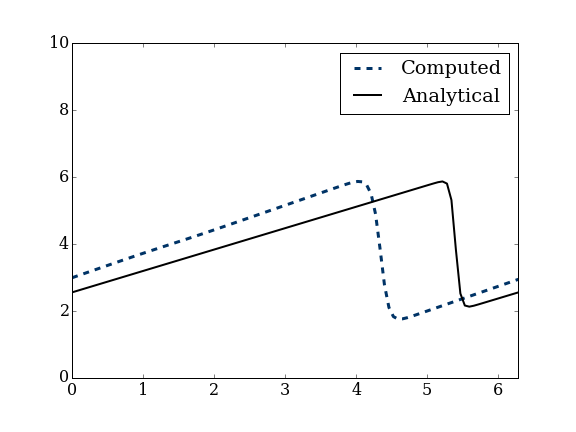
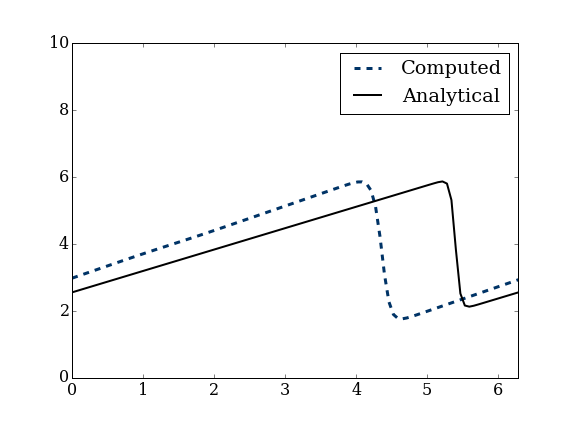
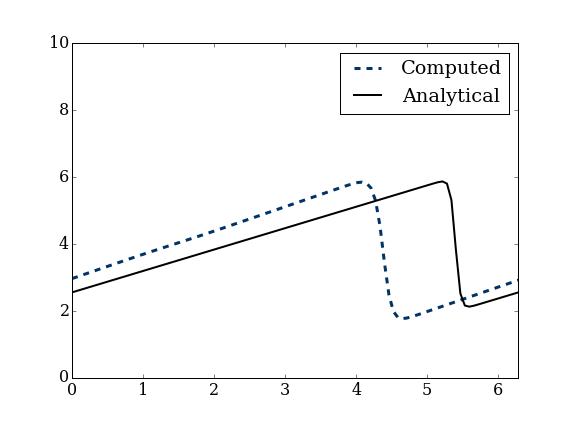
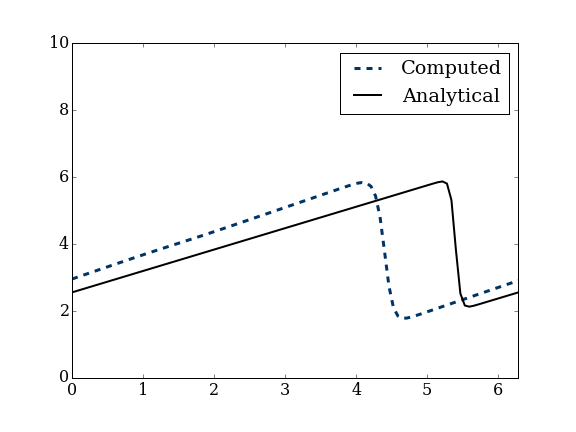
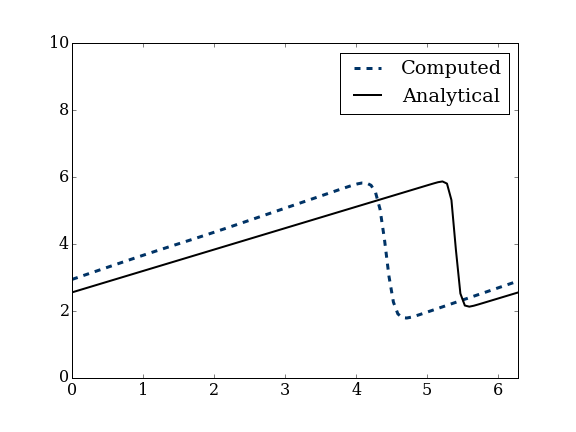
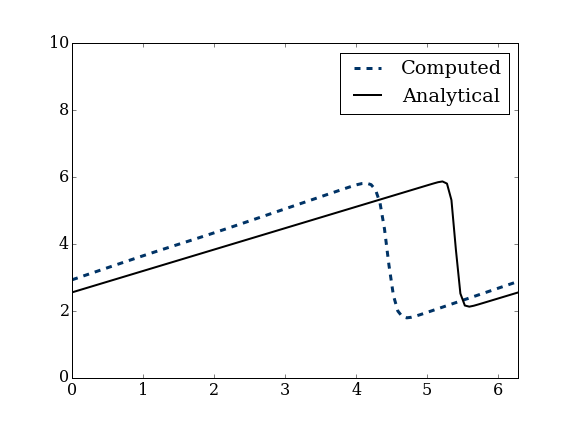
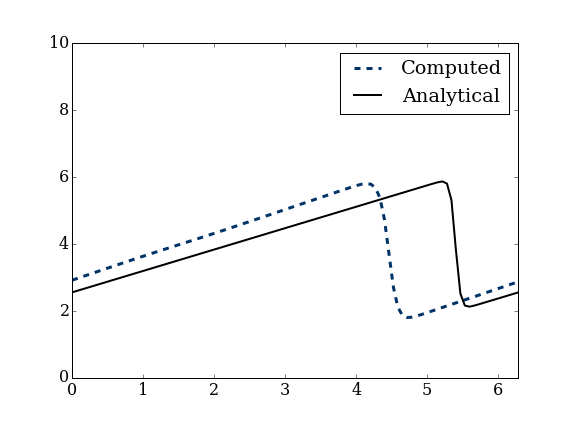
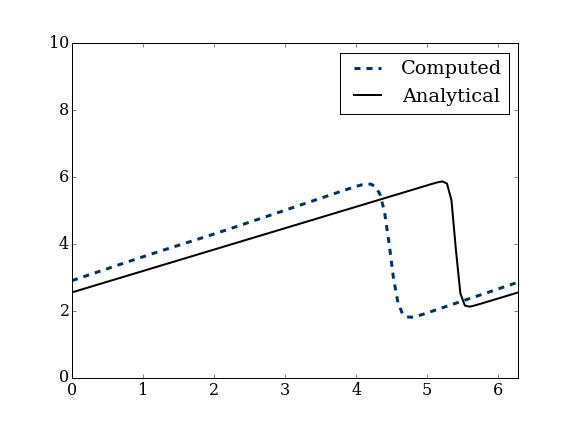
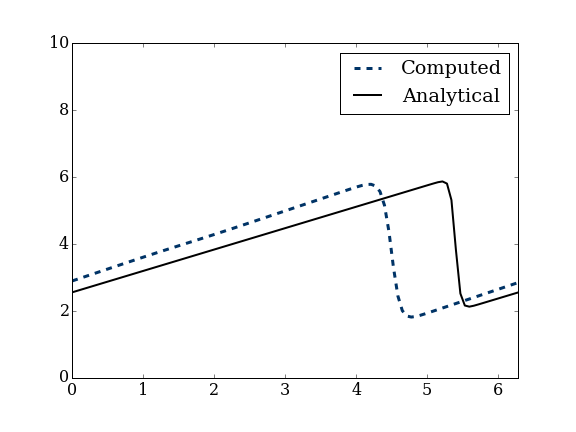
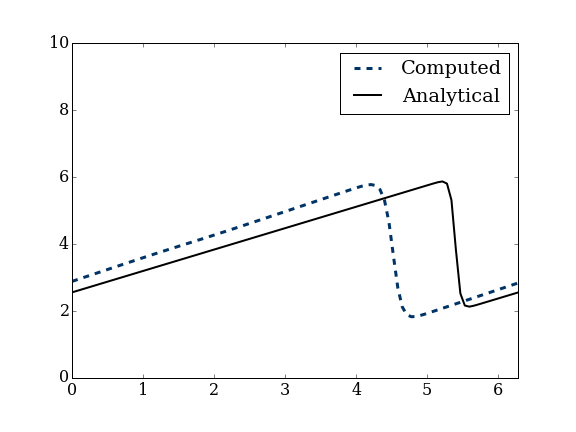
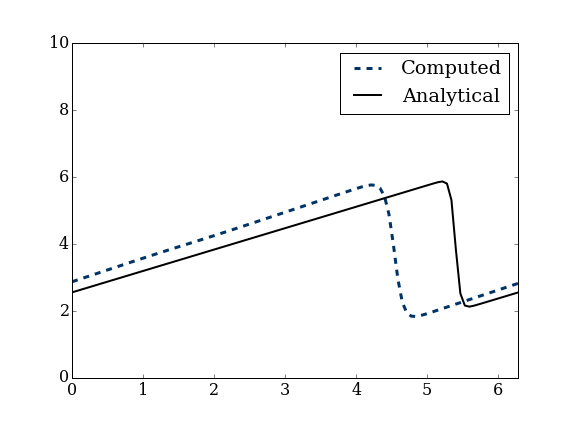
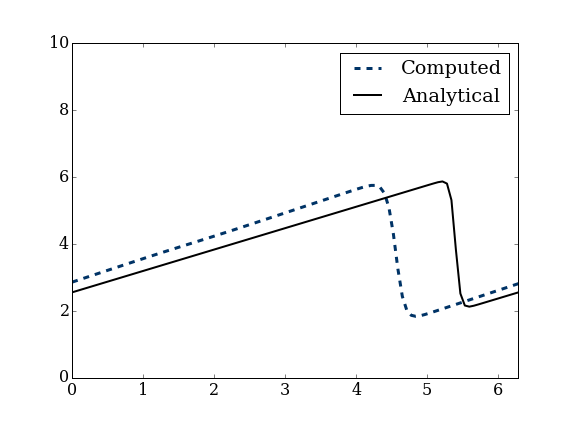
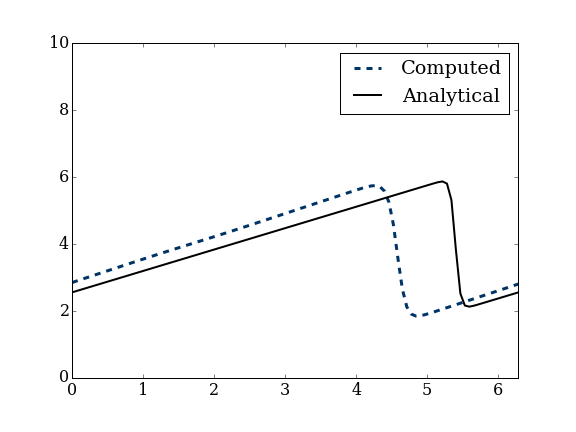
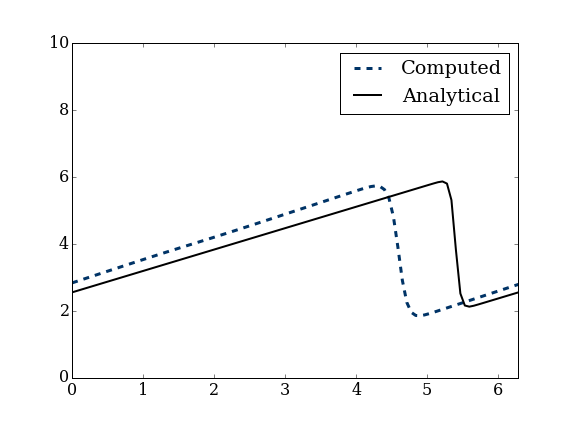
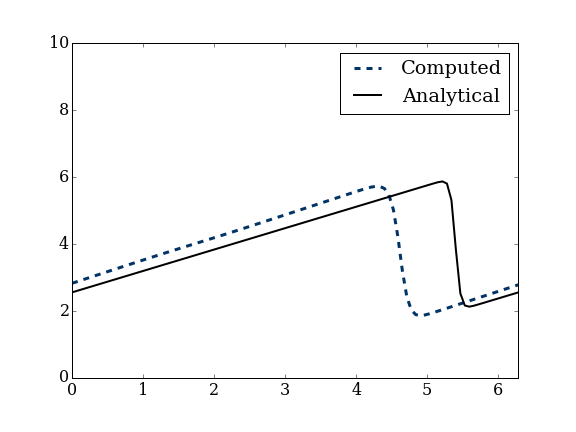
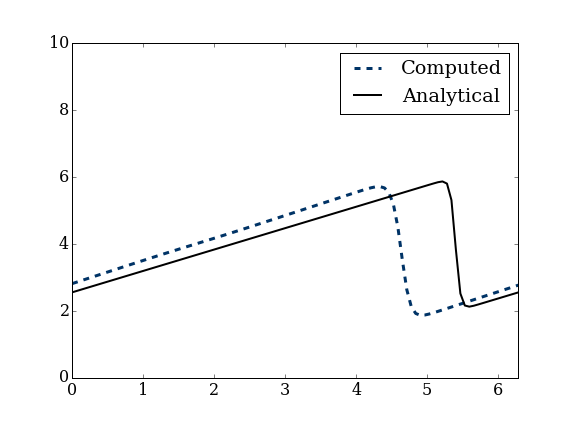
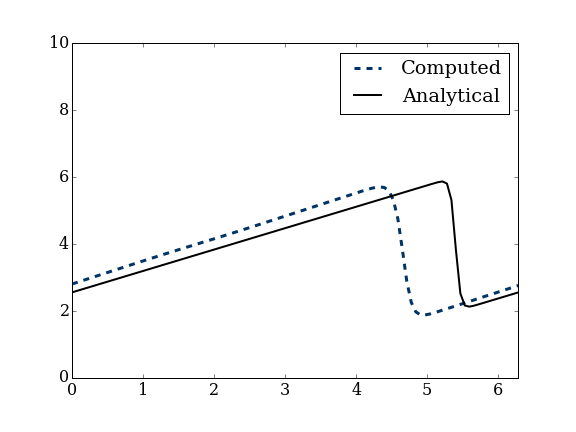
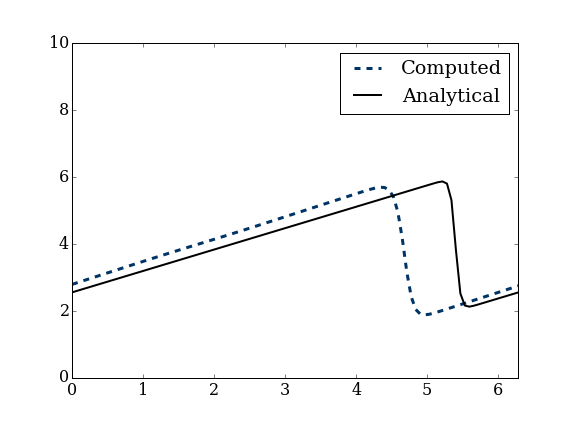
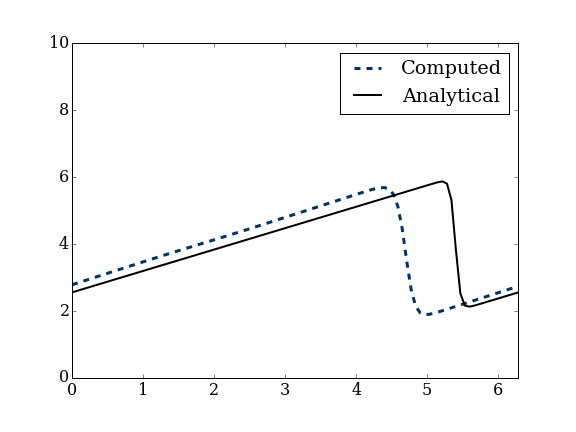
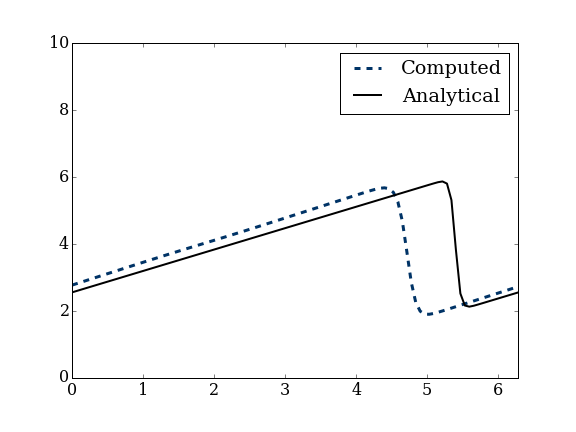
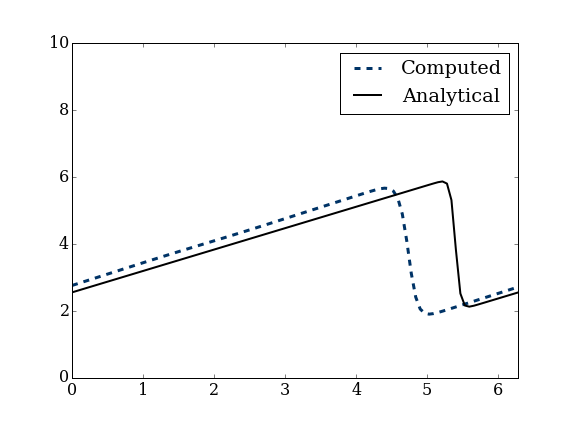
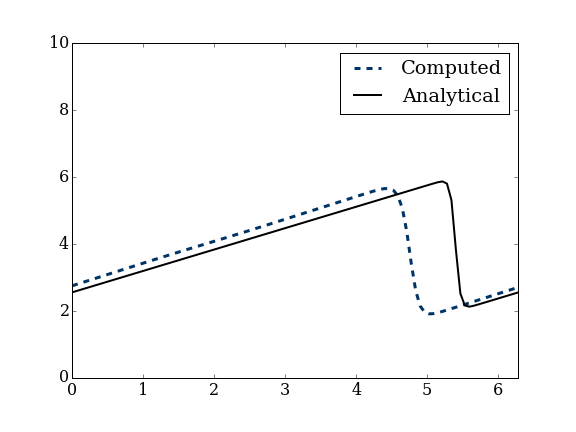
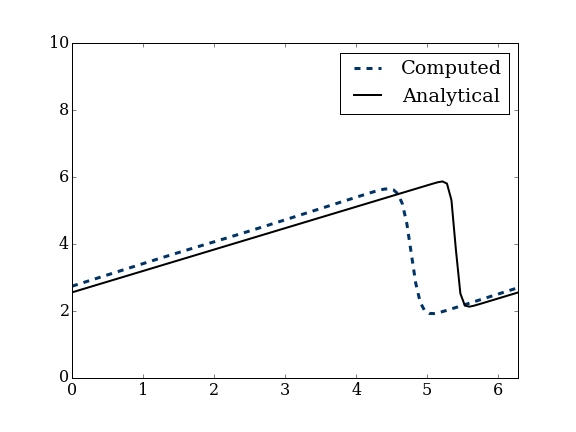
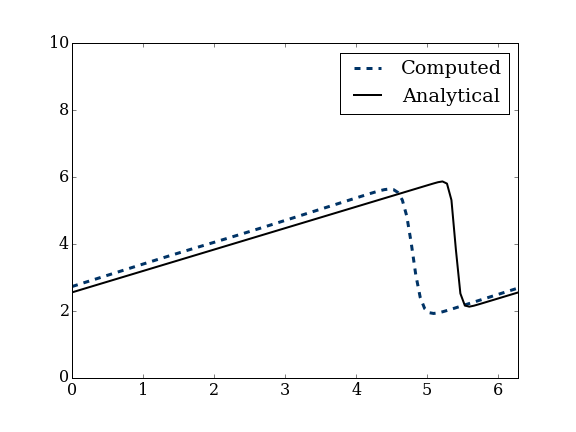
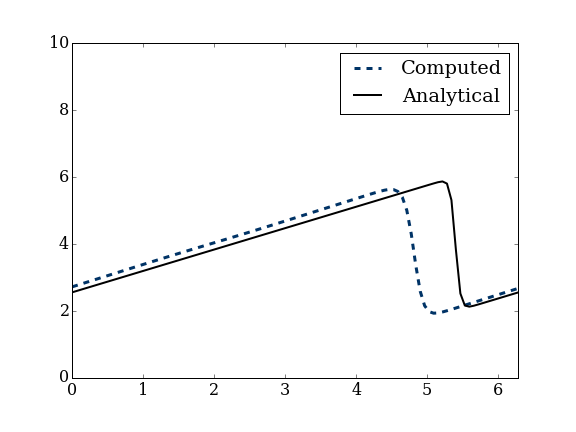
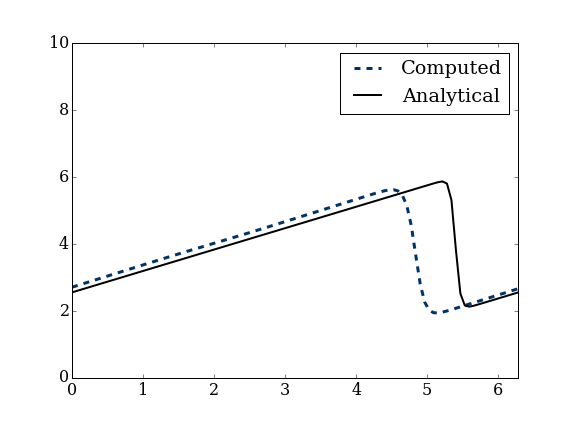
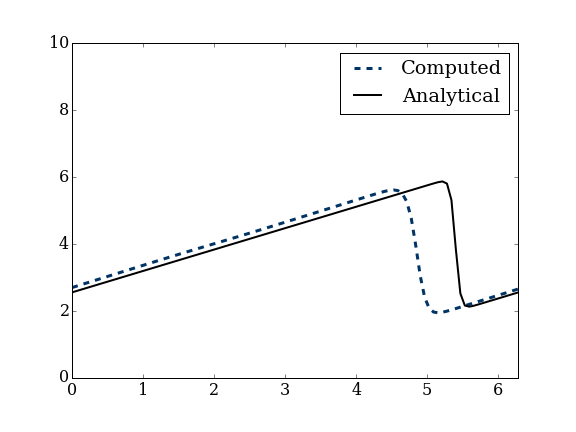
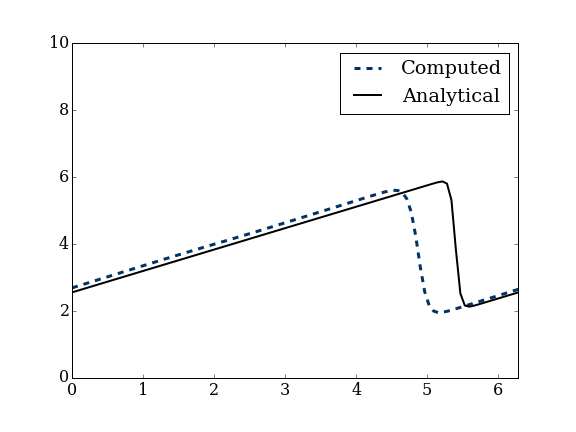
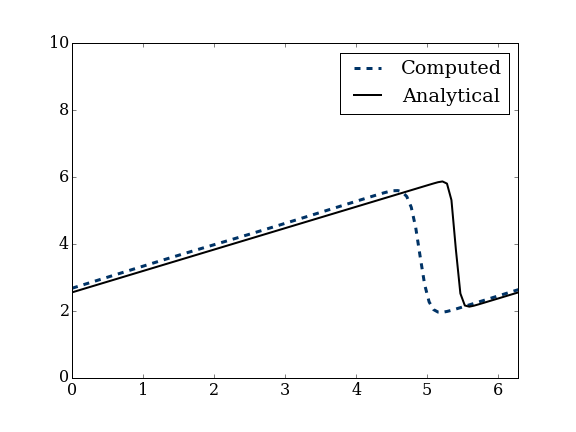
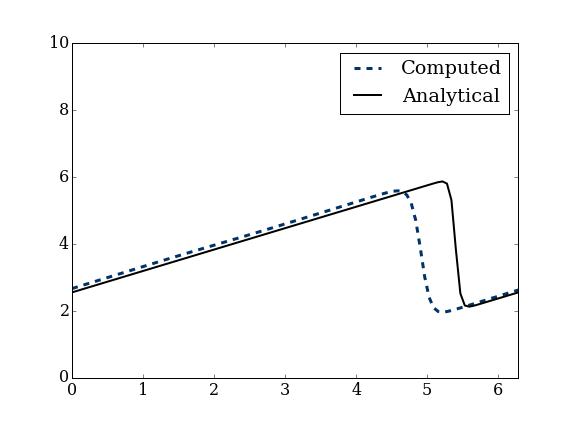
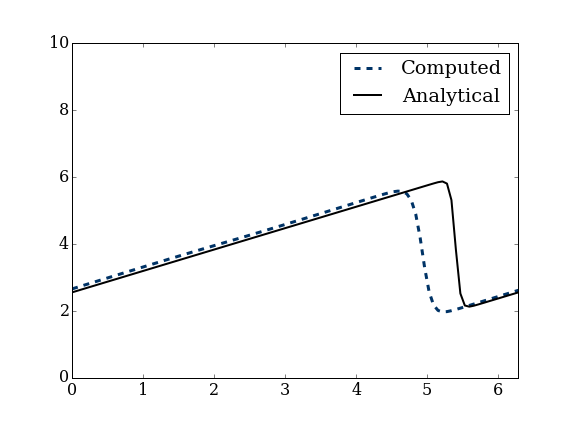
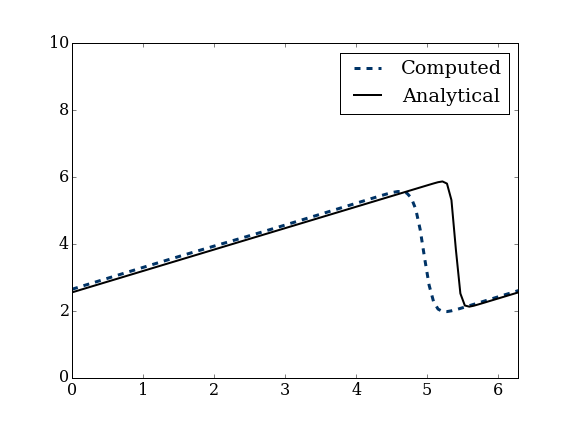
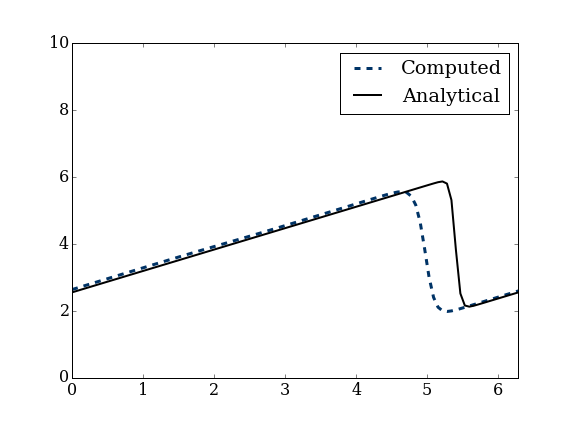
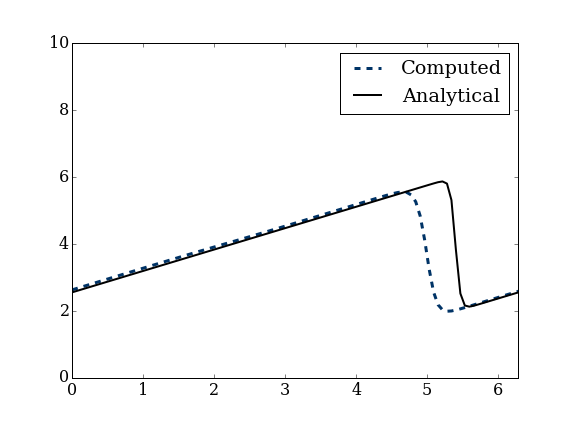
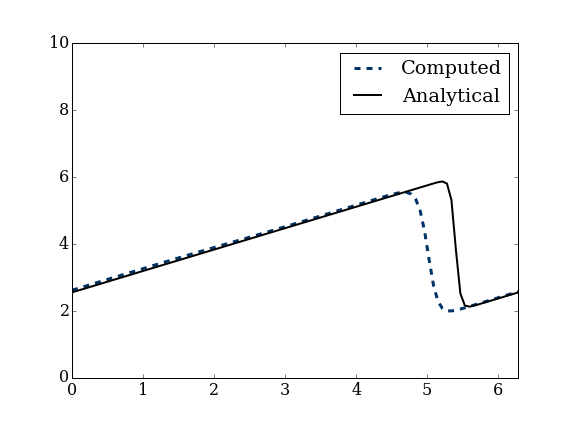
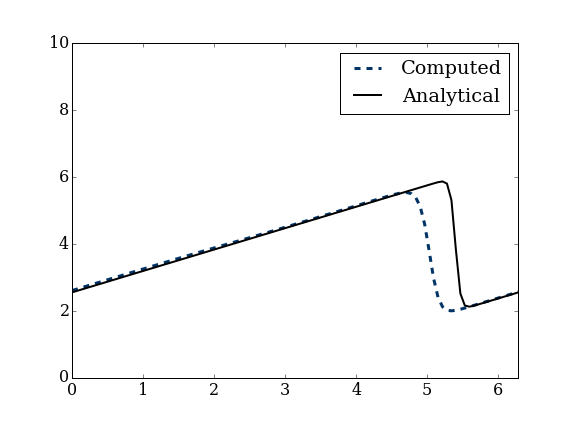
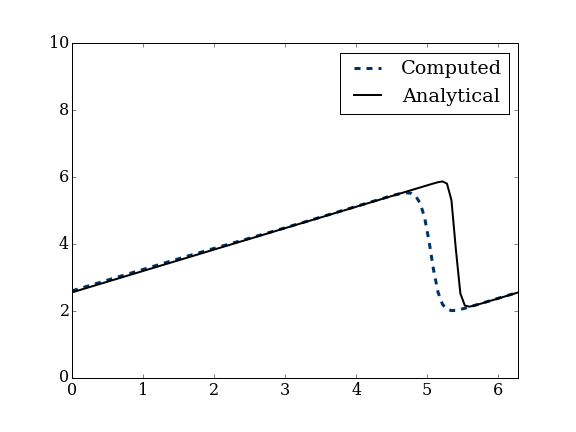
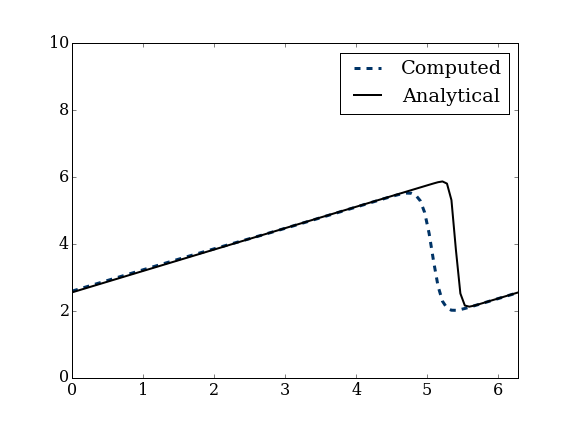
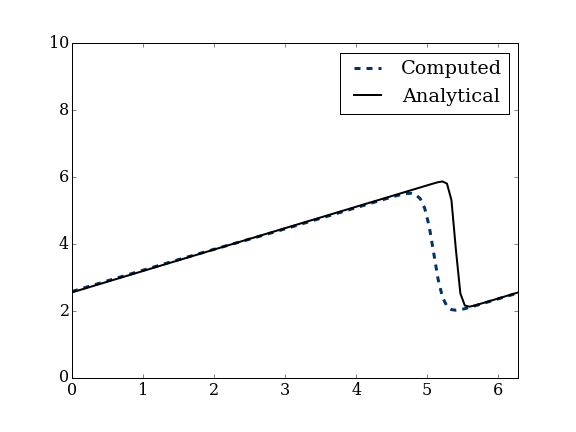

In [15]:
fig=pyplot.figure(figsize=(8,6))
ax=pyplot.axes(xlim=(0,2*numpy.pi),ylim=(0,10))
line=ax.plot([],[],color='#003366',ls='--',lw=3)[0]
line2=ax.plot([],[],'k-',lw=2)[0]
ax.legend(['Computed','Analytical'])
def burgers(n):
    un=u.copy()
    u[1:-1]=un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2])
    u[0]=un[0]-un[0]*dt/dx*(un[0]-un[-1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1])
    u[-1]=un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2])
    u_analytical=numpy.asarray([u_lamb(nt*dt,xi,nu)for xi in x])
    line.set_data(x,u)
    line2.set_data(x,u_analytical)
animation.FuncAnimation(fig,burgers,frames=nt,interval=100)

In [ ]:
%%timeit
u=numpy.asarray([u_lamb(t,x0,nu)for x0 in x])
for n in range(nt):
    un=u.copy()
    for i in range(nx-1):
        u[i]=un[i]-un[i]*dt/dx*(un[i]-un[i-1])+nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
    u[-1]=un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2])

In [ ]:
%%timeit
u=numpy.asarray([u_lamb(t,x0,nu)for x0 in x])
for n in range(nt):
    un=u.copy()
    u[1:-1]=un[1:-1]-un[1:-1]*dt/dx*(un[1:-1]-un[:-2])+nu*dt/dx**2*(un[2:]-2*un[1:-1]+un[:-2])
    u[0]=un[0]-un[0]*dt/dx*(un[0]-un[1])+nu*dt/dx**2*(un[1]-2*un[0]+un[-1])
    u[-1]=un[-1]-un[-1]*dt/dx*(un[-1]-un[-2])+nu*dt/dx**2*(un[0]-2*un[-1]+un[-2])